<a href="https://colab.research.google.com/github/aran2025/ml-practice/blob/main/Dummy_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dummy Data generation

# Prompt:
Generate a Python script that utilizes the Pandas, NumPy, and Matplotlib libraries to create and visualize a dummy time series dataset. The dataset should represent monthly price data in USD, ranging from 2009 to 2024, with prices randomly generated between 50 and 500. The script should include steps for setting up the environment, generating the data, visualizing it as a line plot with labels and a grid, and finally saving the dataset to a CSV file named 'dummy_time_series_2009_2024.csv'. Ensure the script is well-commented and reproducible by setting a random seed.


# Random Time Series Generation and Analysis

   This notebook explores the generation and analysis of random time series data.
   We will cover the following:
   - Generating time series data with different characteristics.
   - Visualizing the generated data.
   - Applying basic time series analysis techniques.

## Step 1: Set up the environment and import libraries



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline


## Step 2: Generate dummy time-series data

In [2]:
# Set seed for reproducibility
np.random.seed(42)

# Create a date range from 2009-01-01 to 2024-12-31
dates = pd.date_range(start="2009-01-01", end="2024-12-31", freq='M')  # Monthly frequency

# Generate dummy prices in USD
prices = np.random.uniform(low=50, high=500, size=len(dates))  # Random prices between 50 and 500

# Create a DataFrame
data = pd.DataFrame({
    'Time': dates,
    'Price (USD)': prices
})

# Display the first few rows
data.head()


<ipython-input-2-461ada0a7572>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2009-01-01", end="2024-12-31", freq='M')  # Monthly frequency


,Time,Price (USD)
0,2009-01-31,218.543053
1,2009-02-28,477.821438
2,2009-03-31,379.397274
3,2009-04-30,319.396318
4,2009-05-31,120.208388


## Step 3: Visualize the data

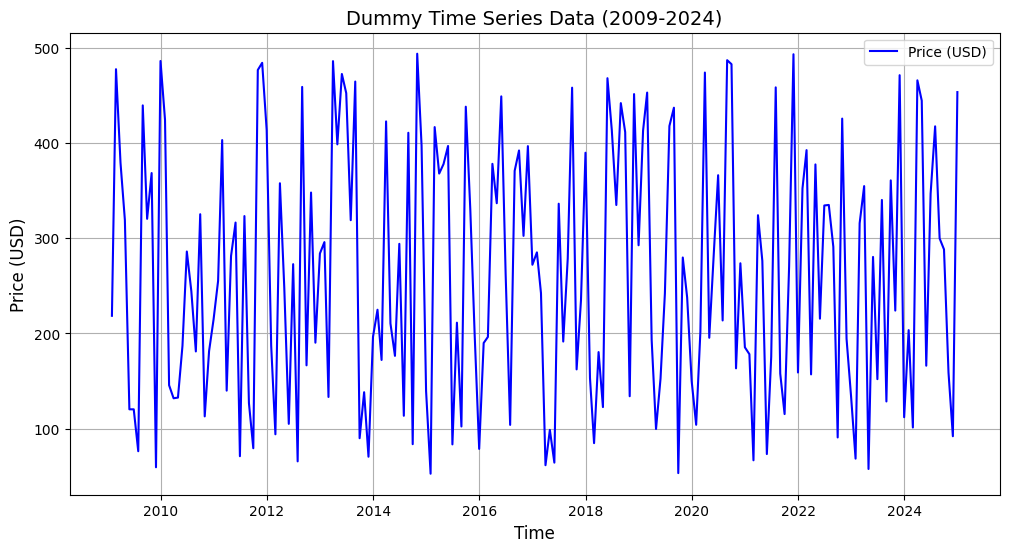

In [3]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data['Time'], data['Price (USD)'], label='Price (USD)', color='blue')
plt.title('Dummy Time Series Data (2009-2024)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid()
plt.show()


In [7]:
import plotly.graph_objects as go
import pandas as pd

# Assuming 'data' is your DataFrame from the previous code

# Create the initial figure
fig = go.Figure(data=[go.Scatter(x=data['Time'], y=data['Price (USD)'])])

# Update layout for buttons
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[{"visible": [True]},
                           {"title": "All Data"}]),
                dict(label="Year",
                     method="update",
                     args=[{"visible": [data['Time'].dt.month == 1]},
                           {"title": "Yearly Data"}]),
                dict(label="Month",
                     method="update",
                     args=[{"visible": [data['Time'].dt.day == 1]},
                           {"title": "Monthly Data"}]),
                dict(label="Week",
                     method="update",
                     args=[{"visible": [data['Time'].dt.dayofweek == 0]},
                           {"title": "Weekly Data"}]),
                dict(label="Day",
                     method="update",
                     args=[{"visible": [data['Time'].dt.hour == 0]},
                           {"title": "Daily Data"}]),
            ]),
        )
    ]
)

fig.show()

In [13]:
import plotly.graph_objects as go
import pandas as pd

def create_interactive_time_series_plot(data):
    """
    Create an interactive time series plot with range selection and slider.

    Parameters:
    -----------
    data : pandas.DataFrame
        DataFrame containing time series data with 'Time' and 'Price (USD)' columns

    Returns:
    --------
    plotly.graph_objects.Figure
        Interactive time series visualization
    """
    # Ensure Time column is in datetime format
    data['Time'] = pd.to_datetime(data['Time'])

    # Create the figure
    fig = go.Figure()

    # Add the main trace
    fig.add_trace(
        go.Scatter(
            x=data['Time'],
            y=data['Price (USD)'],
            mode='lines',
            name='Price',
            line=dict(color='blue')
        )
    )

    # Update layout for comprehensive interactivity
    fig.update_layout(
        title='Interactive Price Time Series Analysis',
        xaxis_title='Date',
        yaxis_title='Price (USD)',
        template='plotly_white',
        height=600,
        width=1200,
        showlegend=True,

        # Configure x-axis with range selector and slider
        xaxis=dict(
            tickformat="%Y-%m-%d",  # Date format
            tickmode="auto",
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1 Day", step="day", stepmode="backward"),
                    dict(count=7, label="1 Week", step="day", stepmode="backward"),
                    dict(count=30, label="1 Month", step="day", stepmode="backward"),
                    dict(count=90, label="3 Months", step="day", stepmode="backward"),
                    dict(count=365, label="1 Year", step="day", stepmode="backward"),
                    dict(step="all", label="All Time")
                ])
            ),
            rangeslider=dict(visible=True),
            type="date"
        )
    )

    return fig

# Usage example (uncomment and adapt as needed)
plot = create_interactive_time_series_plot(data)
plot.show()

## Step 4: Save the dataset

In [4]:
# Save the dataset to a CSV file
data.to_csv('/content/dummy_time_series_2009_2024.csv', index=False)

print("Dataset saved as dummy_time_series_2009_2024.csv")


Dataset saved as dummy_time_series_2009_2024.csv


# Model Apply

## LSTM

In [14]:
# Import necessary libraries for LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt

# Normalize the 'Price' column (LSTM models work well with normalized data)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data['Price (USD)'].values.reshape(-1, 1))

# Prepare data for LSTM: Convert time series into sequences
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define the time step (number of previous days to predict the next price)
time_step = 12  # Use 12 months of previous data to predict the next month's price

# Create dataset
X, y = create_dataset(data_scaled, time_step)

# Reshape X to be compatible with LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [15]:
# Build the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - loss: 0.3661 - val_loss: 0.2461
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2256 - val_loss: 0.1392
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1443 - val_loss: 0.0844
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1010 - val_loss: 0.0924
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1107 - val_loss: 0.0906
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1002 - val_loss: 0.0814
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1032 - val_loss: 0.0819
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1008 - val_loss: 0.0837
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0990 - val_loss: 0.0830
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0960 - val_loss: 0.0809
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0989 - val_loss: 0.0809
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0957 - val_loss: 0.0817
Epoch 13/5

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


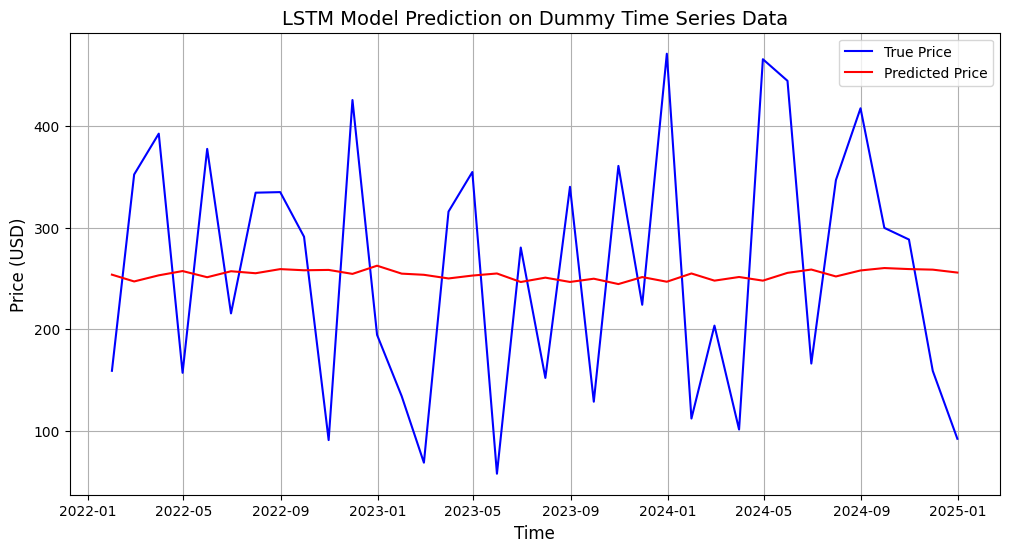

In [16]:
# Make predictions on test data
predicted_prices = model.predict(X_test)

# Inverse transform to get the actual values back from the normalized data
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['Time'][-len(y_test):], y_test_actual, label='True Price', color='blue')
plt.plot(data['Time'][-len(y_test):], predicted_prices, label='Predicted Price', color='red')
plt.title('LSTM Model Prediction on Dummy Time Series Data', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid()
plt.show()


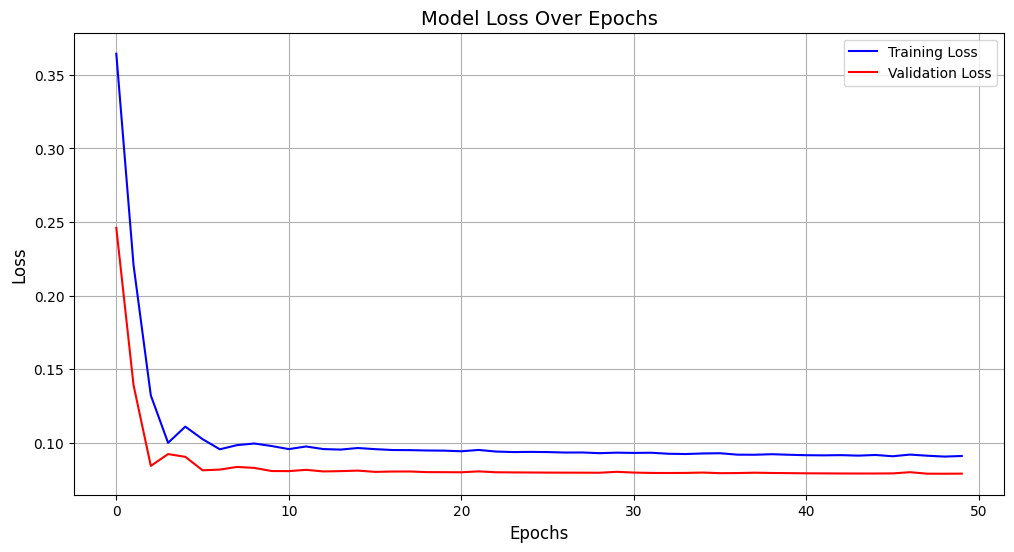

In [17]:
# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Model Loss Over Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid()
plt.show()
